<div align="center">
  <img src="UChicago_logo.png" alt="University of Chicago Logo">
</div>

<h1 align="center">Customer Turnover at Banks</h1>

<h2 align="center">Data Mining Final</h2>

<h3 align="center">GROUP 7</h3>
<h4 align="center">Vincent Caldwell, Roselyn Rozario, Ankit Gubilgari, Alberto Bermea, Norma Ferrel</h4>

<div align="center">
University of Chicago, Applied Data Science<br>
Physical Sciences Division<br>
<br>
ADSP 31008: Data Mining Principles<br>
<br>
Anil Chaturvedi<br>
<br>
March 4th, 2024
</div>

# Table of Contents <a class="anchor" id="home"></a>
1. [Import packages](#Import-packages)
2. [Import dataset](#Import-dataset)
3. [EDA](#EDA)
   * [Features](#Features)
      * [Dataset summary](#Dataset-summary)
   * [Univariate Analysis](#Univariate-Analysis)
   * [Bivariate/Multivariate Analysis](#Bivariate-Multivariate-Analysis)
      * [Summary](#Summary)
4. [Feature Engineering](#Feature-Engineering)
5. [Segmentation Analysis](#Segmentation-Analysis)
6. [Pair Plot](#Pair-Plot)
7. [Facet Grid: Balance Distribution by Geography and Gender](#Facet-Grid-Balance-Distribution-by-Geography-and-Gender)
8. [Hypothesis Testing](#Hypothesis-Testing)
   * [Hypothesis Testing Findings](#Hypothesis-Testing-Findings)
9. [Cohort Analysis](#Cohort-Analysis)
   * [Interpretation](#Interpretation)
10. [Feature Importance](#Feature-Importance)
    * [Feature Importance Analysis Using Random Forest Findings](#Feature-Importance-Analysis-Using-Random-Forest-Findings)
11. [Survival Analysis](#Survival-Analysis)
    * [Interpretation](#Interpretation-1)
    * [Interpretation](#Interpretation-2)
12. [Cox Proportional Hazards Model](#Cox-Hazard)
13. [Gaussian Mixture and Alternate K-Means](#Gaussian-Mixture-and-Alternate-K-Means)
14. [Predictive Modeling](#Predictive-Modeling)
    * [Decision Trees, Random Forest, and XGBoost](#Decision-Trees-Random-Forest-and-XGBoost)
    * [EBM Model](#EBM-Model)
15. [Examining the best model - XGBoost](#Examining-the-best-model-XGBoost)
    * [Feature Importance](#Feature-Importance-1)
    * [Interpreting Features with SHAP](#Interpreting-Features-with-SHAP)
    * [ROC - AUC Curve](#ROC-AUC-Curve)
    * [Error Analysis](#Error-Analysis)

## Import packages <a class="anchor" id="Import-packages"></a>

In [1]:
## Standard Libraries
import numpy as np
import pandas as pd
import warnings

## Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

## Preprocessing & Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

## Machine Learning Models
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import BayesianRidge
from xgboost import XGBClassifier

## Model Evaluation Metrics
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             roc_curve, 
                             auc,
                             silhouette_samples,
                             silhouette_score,
                             explained_variance_score)

## Statistical Analysis
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Survival Analysis
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

## Explainable AI
import shap


[Back to Top](#home)

## Import dataset <a class="anchor" id="Import-dataset"></a>

In [2]:
df = pd.read_csv('bank_turnover_dataset.csv')

[Back to Top](#home)

## EDA <a class="anchor" id="EDA"></a>

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Features <a class="anchor" id="Features"></a>
- RowNumber: The row number.
- CustomerId: Unique identifier for the customer.
- Surname: The surname of the customer.
- CreditScore: The credit score of the customer.
- Geography: The country of the customer.
- Gender: The gender of the customer.
- Age: The age of the customer.
- Tenure: Number of years the customer has been with the bank.
- Balance: The bank balance of the customer.
- NumOfProducts: The number of bank products the customer is using.
- HasCrCard: Indicates whether the customer has a credit card (1) or not (0).
- IsActiveMember: Indicates whether the customer is an active member (1) or not (0).
- EstimatedSalary: The estimated salary of the customer.
- Exited: Indicates whether the customer left the bank (1) or stayed (0).

In [4]:
print(f'{df.info()}\n\n')

print(f'{df.isnull().sum()}\n\n')

print(f'{df.describe()}\n\n')

duplicate_customer_ids = df['CustomerId'].duplicated().sum()
duplicate_rows = df.duplicated().sum()
print(duplicate_customer_ids, duplicate_rows)

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geo

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

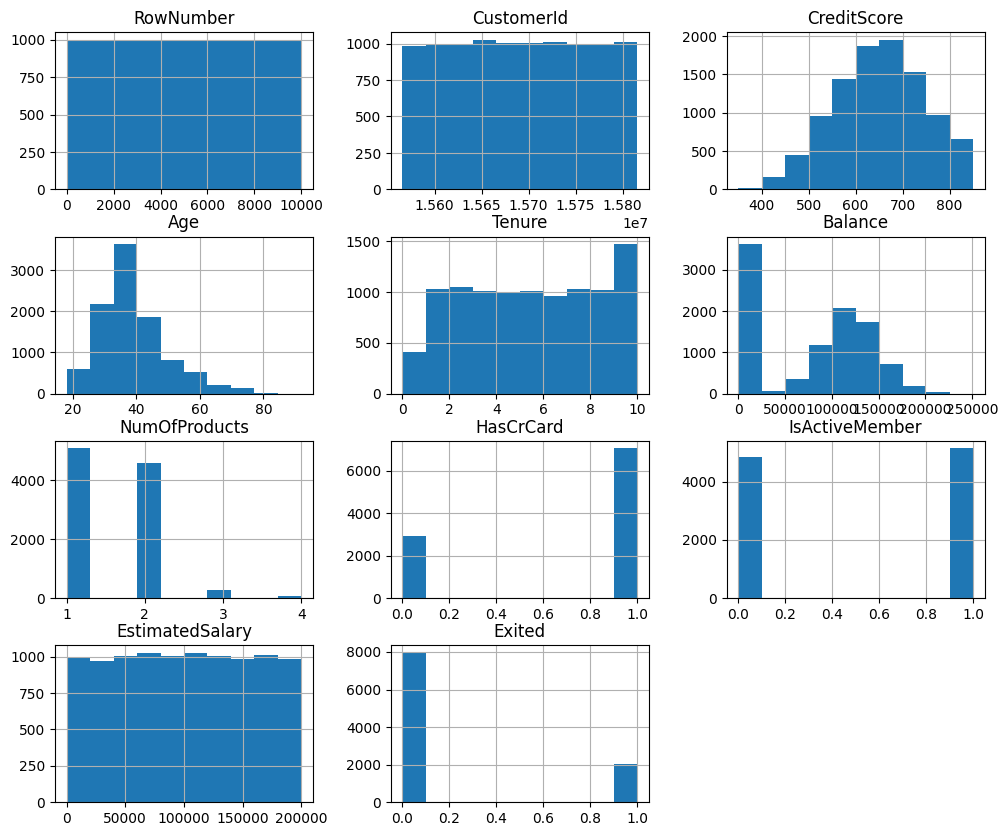

In [5]:
df.hist(figsize=(12, 10))
plt.show()

[Back to Top](#home)

#### Dataset summary <a class="anchor" id="Dataset-summary"></a>
- CreditScore: Ranges from 350 to 850 with a mean of approximately 650.52, indicating a wide range of credit scores among the customers.
- Age: The customers' ages range from 18 to 92 years, with a mean age of around 38.92 years. This shows a broad age distribution among the bank's customers.
- Tenure: Tenure with the bank ranges from 0 to 10 years, with an average tenure of about 5.01 years.
- Balance: Bank balances vary significantly among customers, from 0 to approximately 250,898.09, with an average balance of around 76,485.89. The presence of balances at 0 could - - indicate customers without a current account balance or savings.
- NumOfProducts: Customers use between 1 and 4 products, with an average slightly above 1.5 products per customer.
- HasCrCard and IsActiveMember: These are binary variables indicating whether a customer has a credit card and whether they are considered an active member, respectively.
- EstimatedSalary: Estimated salaries of customers vary widely, ranging from 11.58 to almost 200,000, with an average salary of approximately 100,090.24.
- Exited: This binary variable indicates customer churn, with around 20.37% of customers having exited.

There are no duplicate rows.

[Back to Top](#home)

### Univariate Analysis <a class="anchor" id="Univariate-Analysis"></a>

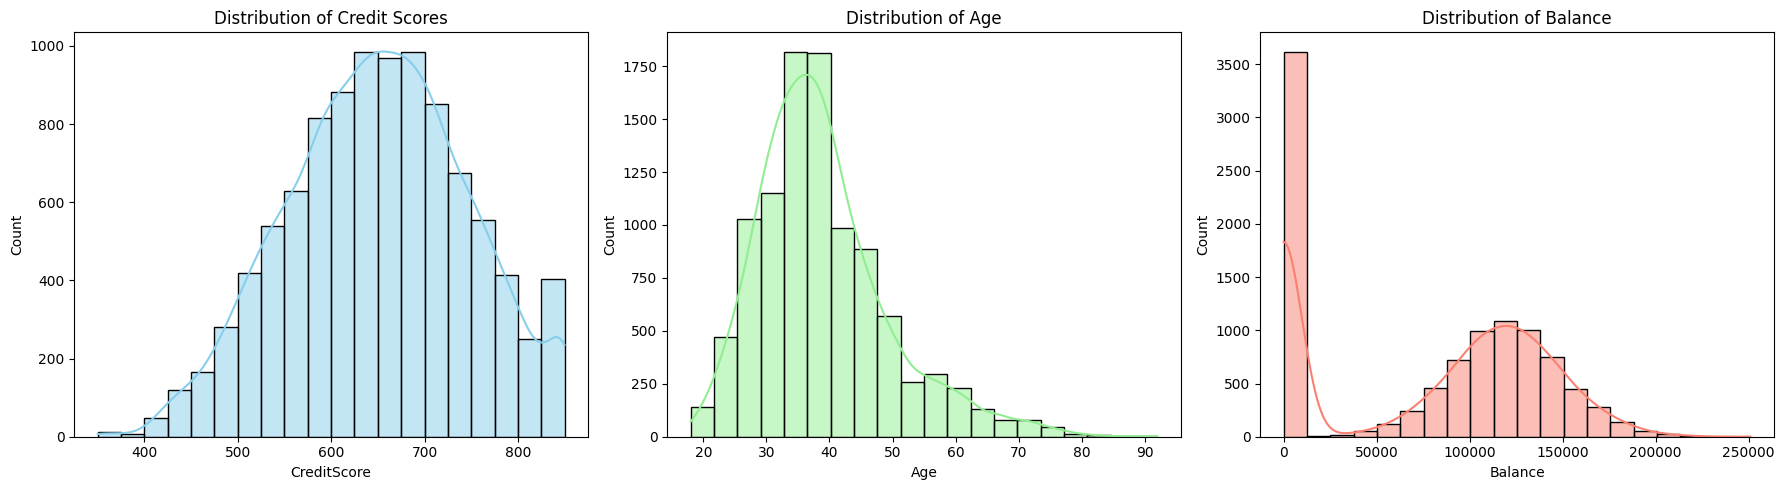

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['CreditScore'], bins=20, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Credit Scores')

sns.histplot(df['Age'], bins=20, kde=True, ax=ax[1], color='lightgreen')
ax[1].set_title('Distribution of Age')

sns.histplot(df['Balance'], bins=20, kde=True, ax=ax[2], color='salmon')
ax[2].set_title('Distribution of Balance')

plt.tight_layout()
plt.show()


Distribution of Credit Scores:

- The distribution of credit scores seems to be approximately normally distributed, which is often expected for credit score data.
- The peak of the distribution appears to be around the 600-700 range, indicating that most customers have credit scores within this range.
- There are fewer customers with very low or very high credit scores, as seen by the tails of the distribution.

Distribution of Age:

- The distribution of age seems to be right-skewed, meaning that there are more young customers than older ones in this dataset.
- The peak appears to be around the 30-40 age range.
- There are fewer customers as age increases, which is typical as fewer older individuals may be engaged with the service or product.

Distribution of Balance:

- The distribution of balance is bimodal, with two peaks visible in the histogram.
- There is a significant peak near 0, which could represent a large number of customers with little to no balance in their accounts.
- The second peak is around the 100,000 to 150,000 range, indicating another common balance amount among the customers.
- The bimodal nature might suggest different segments in the customer base, such as one segment that does not use their account to hold a balance and another that maintains a moderate balance.

Understanding these distributions is critical in many business contexts, especially for predicting churn. For example:

Credit Score: Customers with lower credit scores might be seen as higher risk and more likely to churn due to financial difficulties.

Age: Younger demographics may have different loyalty patterns and might be more prone to churn than older, possibly more settled customers.

Balance: Customers with a high balance might be more engaged with the company's services, while those with low or no balance could be less attached and more likely to leave.

Each of these variables can be an important feature for a churn prediction model, as they can correlate with customer behavior and the likelihood to churn.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



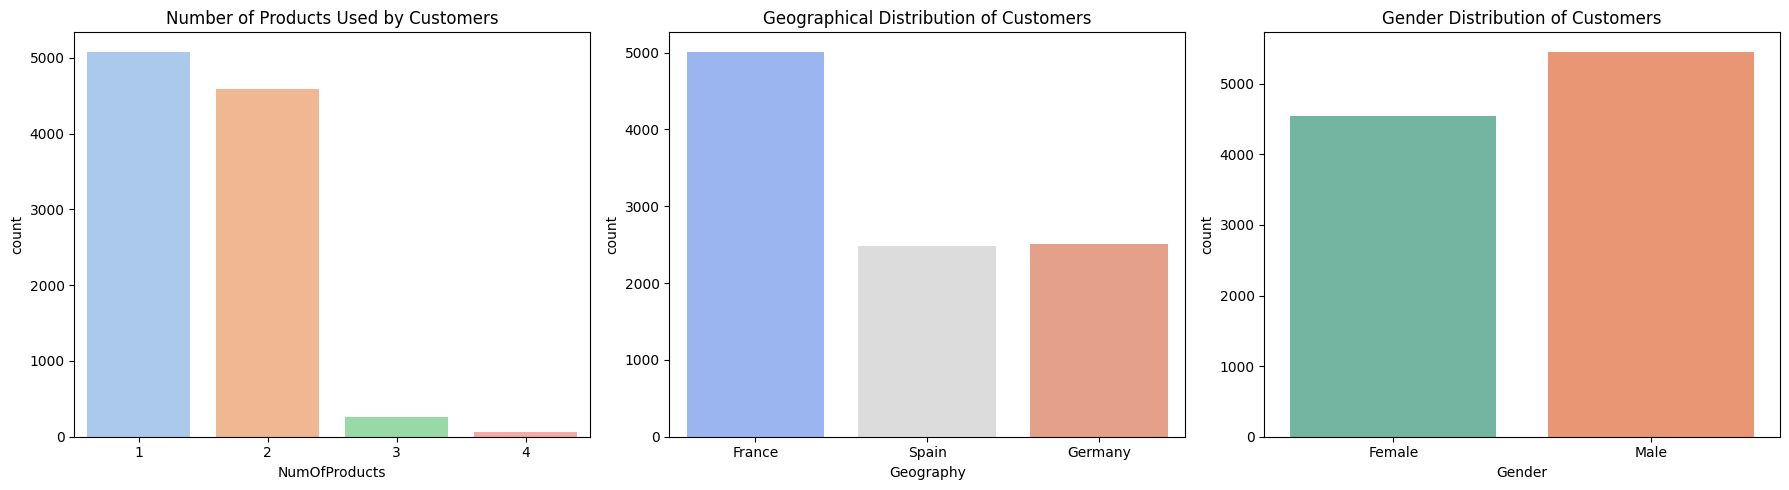

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='NumOfProducts', data=df, ax=ax[0], legend=False, palette='pastel')
ax[0].set_title('Number of Products Used by Customers')

sns.countplot(x='Geography', data=df, ax=ax[1], legend=False, palette='coolwarm')
ax[1].set_title('Geographical Distribution of Customers')

sns.countplot(x='Gender', data=df, ax=ax[2], legend=False, palette='Set2')
ax[2].set_title('Gender Distribution of Customers')

plt.tight_layout()
plt.show()

- Number of Products: Most customers use 1 or 2 bank products, with a significant drop in the number of customers using 3 or 4 products. This suggests that the bank's customers tend to prefer a smaller number of banking services.
- Geography: The customers are primarily from France, with a notably lower number of customers from Spain and Germany. This indicates a geographical concentration of customers in France.
- Gender: The distribution between genders shows a slight skew towards male customers, indicating that there are more male customers than female customers in the dataset.

[Back to Top](#home)

### Bivariate/Multivariate Analysis <a class="anchor" id="Bivariate-Multivariate-Analysis"></a>

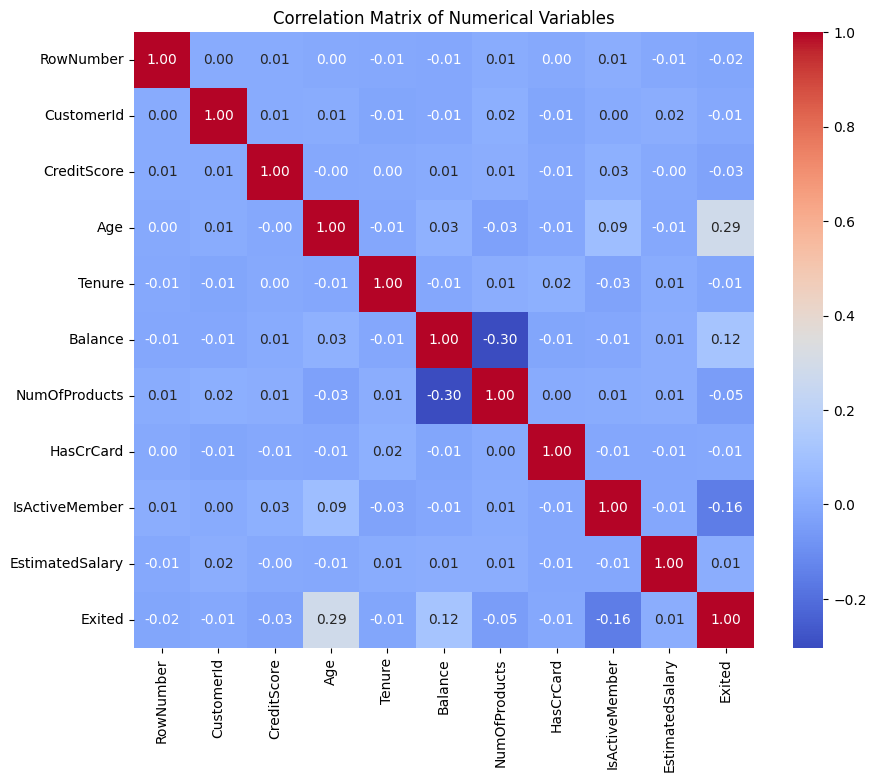

In [8]:
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

The correlation matrix reveals the following insights about the relationships between numerical variables:

CreditScore: This variable has a very low correlation with other variables, suggesting it does not have a strong linear relationship with them.

Age: Shows a moderate positive correlation with Exited (0.29), indicating that older customers are somewhat more likely to churn. There is also a small positive correlation with Balance_to_Salary_Ratio (0.45), suggesting that as customers' age, the proportion of their balance to their estimated salary increases.

Tenure: Shows a moderate negative correlation with Cluster (-0.56), suggesting that customers with longer tenure may belong to specific clusters. Tenure has very little correlation with other variables.

Balance: There is a moderate negative correlation with NumOfProducts (-0.30) and Cluster (-0.56), indicating that higher balances may be associated with fewer products and certain clusters. There's also a positive correlation with Exited (0.12), suggesting customers with higher balances are slightly more likely to churn.

NumOfProducts: Shows a moderate negative correlation with Balance (-0.30) and a small negative correlation with Exited (-0.16), suggesting that customers with more products tend to have a lower balance and are less likely to churn.

HasCrCard: This variable does not show any significant correlation with other variables.

IsActiveMember: Displays a moderate negative correlation with Exited (-0.16), indicating that active members are less likely to churn.

EstimatedSalary: There is no significant correlation observed with other variables.

Exited: This is the churn variable. Besides the correlations mentioned with Age, Balance, and IsActiveMember, it does not show significant correlations with other variables.

Balance_to_Salary_Ratio: It has a strong positive correlation with Age (0.45), suggesting that older customers tend to have a higher balance relative to their salary.

Cluster: Shows strong negative correlations with Tenure (-0.56) and Balance (-0.56), indicating that the clustering may be driven in part by these variables. The strong correlation with Cluster suggests that this variable is important in defining cluster membership.

Overall, the heatmap suggests that certain variables like Age, Balance, and IsActiveMember have more of a relationship with customer churn (Exited). NumOfProducts seems to play a role in both balance and churn rate. Variables like CreditScore and EstimatedSalary appear to have little linear relationship with churn. The identified relationships are worth further investigation to confirm if they are causative and to understand the underlying reasons.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



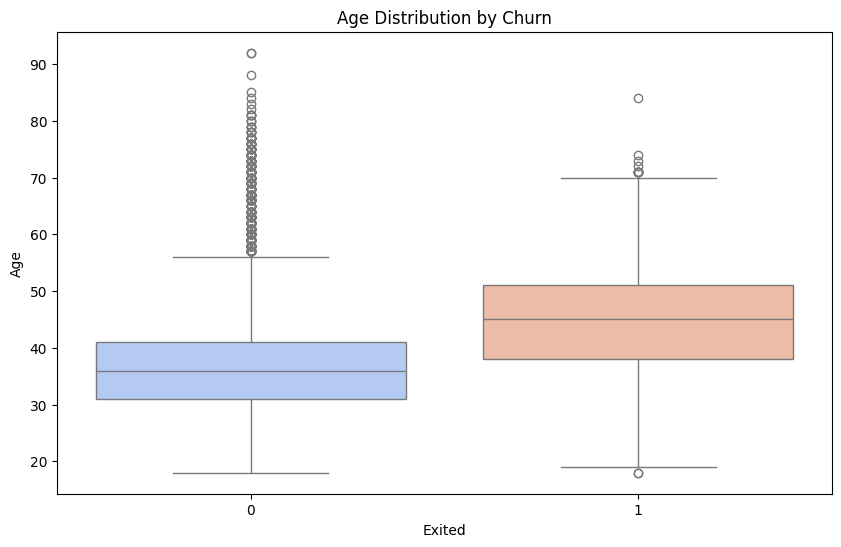

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=df, palette='coolwarm')
plt.title('Age Distribution by Churn')
plt.show()

The boxplot comparing Age and customer churn (Exited) illustrates that:

- Customers who exited (churned) tend to be older than those who stayed. The median age of churned customers is notably higher, and the interquartile range (IQR) also shifts upwards.
- The presence of outliers in both groups indicates variability in ages, but the overall trend suggests age as a potential factor in customer churn, with older customers showing a higher propensity to leave.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



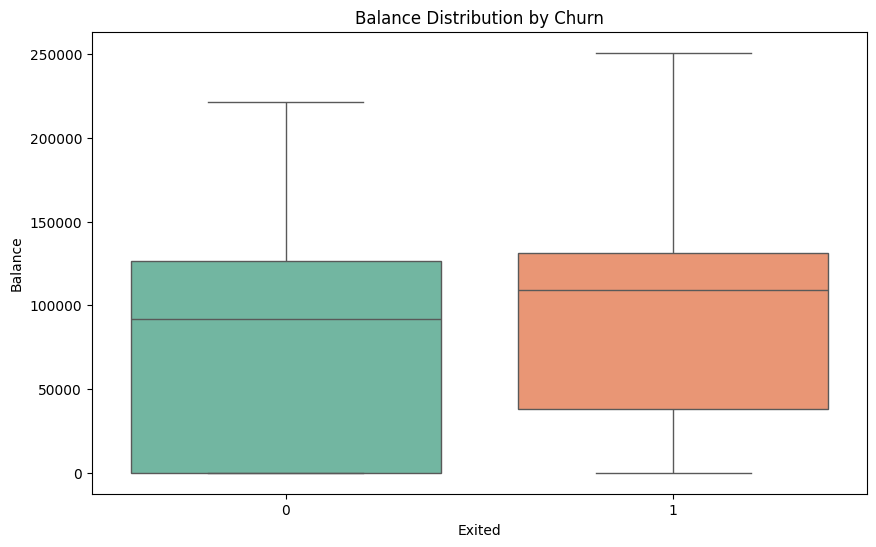

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=df, palette='Set2')
plt.title('Balance Distribution by Churn')
plt.show()

The boxplot for Balance distribution by churn status reveals:

- Customers who have exited generally have a higher median balance compared to those who stayed. This is interesting because it suggests that having a higher balance does not necessarily translate to customer loyalty.
- The distribution for customers who stayed (not exited) shows a significant number of customers with a balance of zero, which is not as prevalent among customers who exited. This could imply that customers with lower or no balances might have different reasons for staying with the bank, possibly related to other services or products they use.

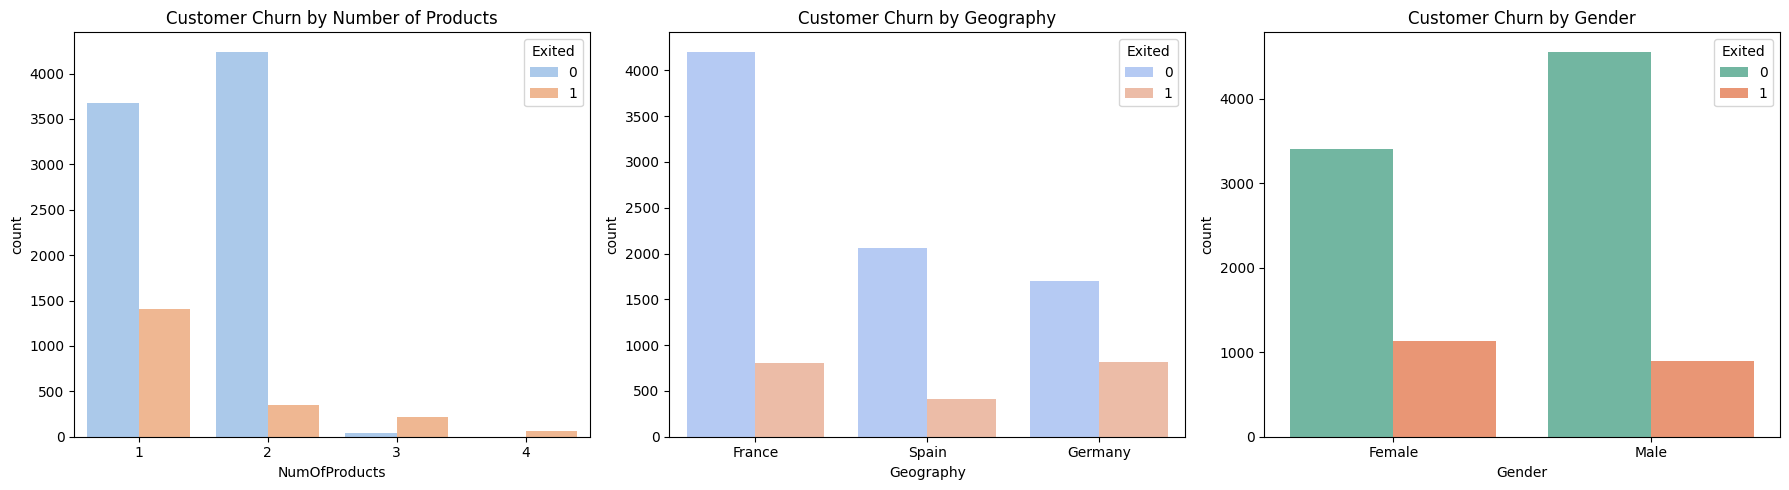

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(x='NumOfProducts', hue='Exited', data=df, ax=ax[0], palette='pastel')
ax[0].set_title('Customer Churn by Number of Products')

sns.countplot(x='Geography', hue='Exited', data=df, ax=ax[1], palette='coolwarm')
ax[1].set_title('Customer Churn by Geography')

sns.countplot(x='Gender', hue='Exited', data=df, ax=ax[2], palette='Set2')
ax[2].set_title('Customer Churn by Gender')

plt.tight_layout()
plt.show()

#### Summary <a class="anchor" id="Summary"></a>

Dataset Overview: The dataset contains 10,000 entries with 14 columns, including customer demographic information, account details, and a binary churn indicator (Exited).

Missing Values and Duplicates: No missing values or duplicate rows/IDs were found, indicating a clean dataset ready for analysis.

**Statistical Summary:**

- The CreditScore ranges widely among customers, with a majority having good scores.
- The Age distribution is right-skewed, suggesting a younger customer base, but older customers show a higher tendency to churn.
- The Balance distribution shows a significant number of customers with zero balance, and higher balances are associated with churned customers.

**Univariate Analysis:**

- A significant number of customers use 1-2 bank products, with fewer customers using 3-4 products.
- Most customers are from France, with fewer from Spain and Germany.
- There's a slight skew towards male customers in the dataset.

**Bivariate/Multivariate Analysis:**

- Age and Balance show a relationship with customer churn, with older customers and those with higher balances more likely to churn.
- Customers using multiple products have a varied churn rate, notably higher among those using 3 products.
- Churn rates vary by geography, with some regions showing higher churn.
- Gender also influences churn, with some differences observed between male and female customers.

**Key Insights:**

- Older customers and those with higher balances are more likely to churn, suggesting that personalized retention strategies targeting these segments could be beneficial.
- The number of products used by a customer has a nuanced relationship with churn, indicating potential for product optimization or bundling strategies.
- Geographic and gender differences in churn rates highlight the importance of localized and targeted marketing or service strategies.

While the initial exploratory data analysis (EDA) provided a comprehensive overview and insightful findings about customer behavior and churn, several specific additional analyses could further deepen our understanding or reveal new insights.

[Back to Top](#home)

## Feature Engineering <a class="anchor" id="Feature-Engineering"></a>

- Interaction Terms: Create new variables that are combinations of existing features, for example, the interaction between Age and NumOfProducts, to see if customers in certain age groups with specific product counts are more likely to churn.
- Aggregated Features: For categorical variables like Geography and Gender, create aggregated features such as the average balance or credit score by geography or gender to explore broader trends.

- AgeGroup_Products: An interaction term combining Age and NumOfProducts to see if there's a pattern in churn rates among different age groups using a different number of products.So, we've created a new feature combining the age group and the number of products used by each customer (e.g., "40-50_1" represents customers aged 40-50 using 1 product). This feature could help us identify patterns in churn rates among different age groups with varying product usage.
- Balance_to_Salary_Ratio: The ratio of Balance to EstimatedSalary might indicate financial behavior that correlates with churn. This ratio might indicate how much of their estimated salary customers tend to keep in their bank balance, which could be a factor in their financial behavior and potentially influence their decision to churn.

In [12]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '>60'])
df['AgeGroup_Products'] = df['AgeGroup'].astype(str) + "_" + df['NumOfProducts'].astype(str)

df['Balance_to_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']

df[['AgeGroup', 'AgeGroup_Products', 'Balance_to_Salary_Ratio']].head()

,AgeGroup,AgeGroup_Products,Balance_to_Salary_Ratio
0,40-50,40-50_1,0.000000
1,40-50,40-50_1,0.744677
2,40-50,40-50_3,1.401375
3,30-40,30-40_2,0.000000
4,40-50,40-50_1,1.587055


[Back to Top](#home)

## Segmentation Analysis <a class="anchor" id="Segmentation-Analysis"></a>
We'll perform a simple K-means clustering to segment the customer base into distinct groups based on their features. We'll focus on numerical features like Age, CreditScore, Balance, and NumOfProducts.

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` exp

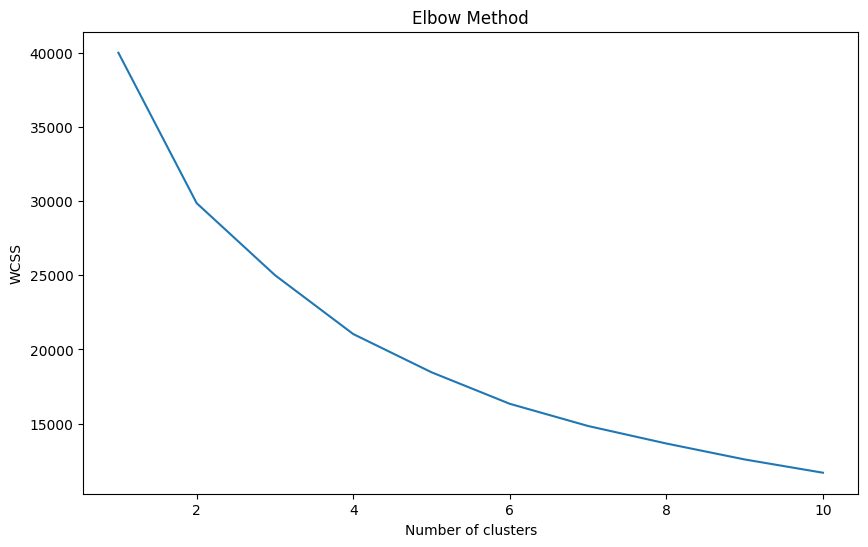

In [13]:
features_for_clustering = ['Age', 'CreditScore', 'Balance', 'NumOfProducts']
X = df[features_for_clustering]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
features_for_clustering = ['Age', 'CreditScore', 'Balance', 'NumOfProducts']
X = df[features_for_clustering]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

cluster_labels = kmeans.predict(X_scaled)

df['Cluster'] = cluster_labels

centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features_for_clustering)

cluster_characteristics = df.select_dtypes(include=[np.number]).groupby('Cluster').mean()

centroids, cluster_characteristics


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


(         Age  CreditScore        Balance  NumOfProducts
 0  36.896084   653.634036  121050.341662       2.141064
 1  35.785303   650.612680  121043.303755       1.000000
 2  35.595547   648.734385     818.854094       1.820346
 3  58.611963   650.012270   77498.599785       1.288344,
            RowNumber    CustomerId  CreditScore        Age    Tenure  \
 Cluster                                                                
 0        4940.868976  1.569272e+07   653.634036  36.896084  4.991968   
 1        5001.122120  1.568925e+07   650.641705  35.791475  4.971198   
 2        5050.466296  1.569150e+07   648.734385  35.595547  5.108225   
 3        4965.963902  1.569133e+07   649.933948  58.630568  4.918587   
 
                Balance  NumOfProducts  HasCrCard  IsActiveMember  \
 Cluster                                                            
 0        121050.341662       2.141064   0.695783        0.503012   
 1        121017.025222       1.000000   0.704493        0.491935  

The K-Means clustering with four clusters has been performed on the dataset, and the cluster centroids have been calculated. The centroids give us the average value of each feature within the cluster, while the cluster characteristics provide the means of each feature for each cluster in the original scale. Here are the interpretations for each cluster:

Cluster Centroids (Standardized Scale):

Cluster 0: Younger customers with average credit scores, low balances, and a high number of products.

Cluster 1: Young customers with average credit scores, high balances, and typically only one product.

Cluster 2: Slightly older customers with slightly higher credit scores, high balances, and a significant number of products.

Cluster 3: Much older customers with average credit scores, lower balances, and a low number of products.

Cluster Characteristics (Original Scale):

Cluster 0:
- Mean Age: Approximately 35 years old.
- Mean Balance: Very low (close to 818, likely indicating a large number of customers with a zero balance).
- Mean Number of Products: Around 1.82.
- Churn Rate: Low (around 9.8%).

Cluster 1:
- Mean Age: Approximately 35 years old.
- Mean Balance: High (around 121,017).
- Mean Number of Products: Exactly 1.
- Churn Rate: Moderate (around 20.6%).

Cluster 2:
- Mean Age: Approximately 36 years old.
- Mean Balance: High (similar to cluster 1).
- Mean Number of Products: Around 2.14, suggesting a higher product engagement.

Churn Rate: Moderate (similar to cluster 1).

Cluster 3:
- Mean Age: Significantly older, around 58 years old.
- Mean Balance: Moderate (around 77,576).
- Mean Number of Products: Around 1.29.

Churn Rate: High (around 45.7%).

Insights:

Young Customers with High Balances (Clusters 1 and 2): Despite their high balances, these customers have a moderate churn rate, which may indicate opportunities for improved retention strategies.

Older Customers (Cluster 3): This group has the highest churn rate, which suggests that the bank's offerings may not align well with the needs of its older customers.

Young Customers with Low Balances (Cluster 0): They have the lowest churn rate, which might be indicative of a solid foundation of customers who could be targeted for growth through cross-selling or upselling additional products.

Strategy Implications:

- For clusters with high balances (Clusters 1 and 2), personalized financial advisory services or premium product offerings could enhance retention.
- For the older age group with a high churn rate (Cluster 3), the bank could explore services tailored to retirement planning or offer better customer service and support.
- The bank could also investigate why customers in Cluster 0 have low balances and create strategies to help them grow their financial assets.

[Back to Top](#home)

## Pair Plot <a class="anchor" id="Pair-Plot"></a>

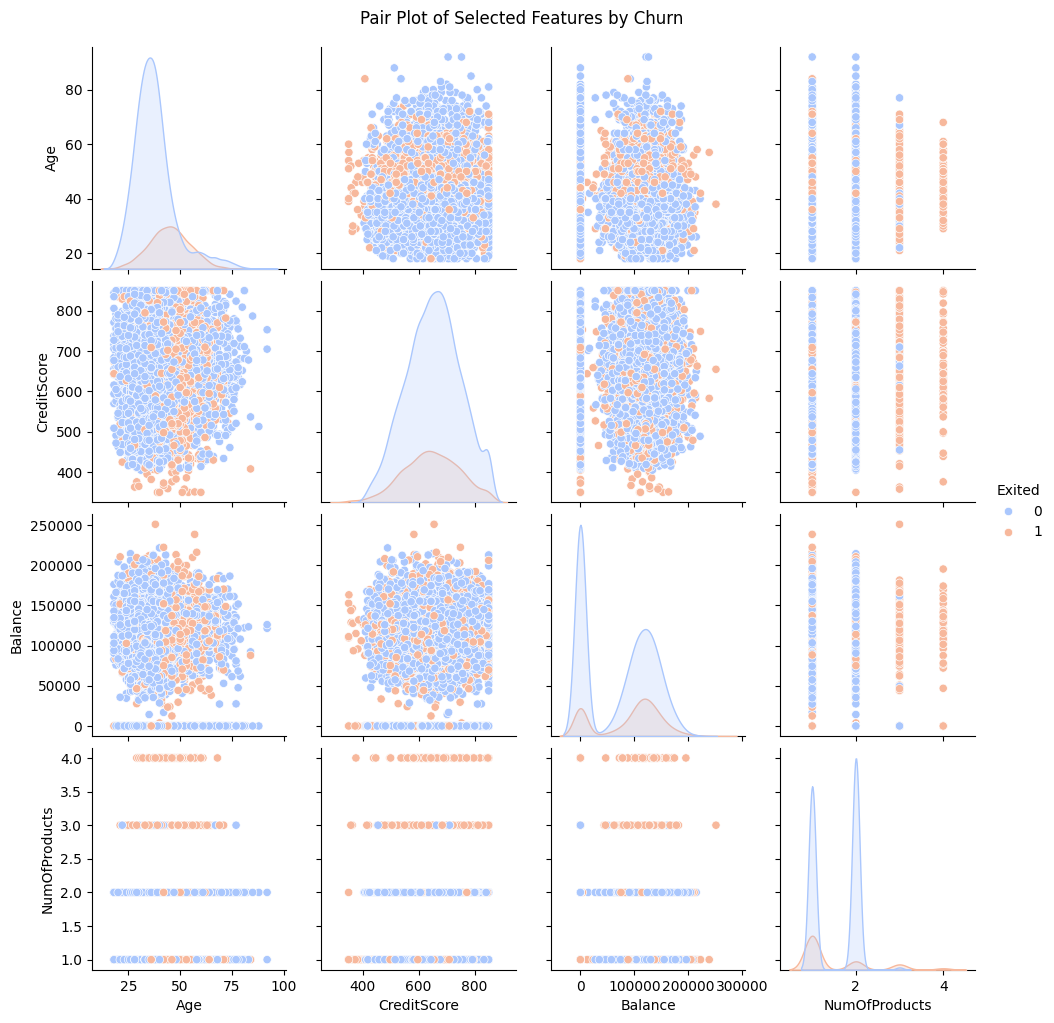

In [15]:
subset_variables = ['Age', 'CreditScore', 'Balance', 'NumOfProducts', 'Exited']

sns.pairplot(df[subset_variables], hue='Exited', palette='coolwarm')
plt.suptitle('Pair Plot of Selected Features by Churn', y=1.02)
plt.show()

For each feature, there is a histogram where the blue indicates customers who have not churned (Exited = 0), and the orange indicates those who have churned (Exited = 1).

Age: The histogram shows a relatively even distribution of ages for those who have not churned, but a higher concentration of older customers among those who have churned.

CreditScore: There appears to be a normal distribution for both churned and not churned customers, with a slight indication of lower credit scores being more prevalent in churned customers.

Balance: Many customers who haven't churned have a lower balance, indicated by a peak at the lower end of the balance range. For churned customers, the balance distribution is more spread out.

NumOfProducts: A significant number of customers who have not churned use 1-2 products, while churned customers have a slight increase in the number using 3 products.

Scatterplots:

The scatterplots compare pairs of features, with the blue points representing non-churned customers and orange representing churned customers.

Age vs. CreditScore: There is no clear pattern indicating a relationship between Age and CreditScore in relation to churn.

Age vs. Balance: There is no distinct trend observable between Age and Balance that correlates with churn.

Age vs. NumOfProducts: There doesn't appear to be a clear relationship between Age and NumOfProducts concerning churn, although there are more orange points (churned customers) at higher product numbers.

CreditScore vs. Balance: Similarly, there's no evident pattern linking CreditScore and Balance with churn.

CreditScore vs. NumOfProducts: There is no clear pattern, though churned customers seem slightly more likely to have more products.

Balance vs. NumOfProducts: There is a noticeable cluster of churned customers with higher balances and 1-2 products.

General Observations:

- Churned customers tend to be older and have higher balances across the dataset.
- There is no clear relationship between CreditScore and churn.
- Customers with a higher number of products show some increased churn, particularly for those with 3 products.

The plot suggests that while Age and Balance may have some association with churn, CreditScore and NumOfProducts do not have a clear linear relationship with churn when considered individually. The data might benefit from a multivariate analysis or a machine learning model that can capture complex interactions between features.

[Back to Top](#home)

## Facet Grid - Balance Distribution by Geography and Gender <a class="anchor" id="Facet-Grid-Balance-Distribution-by-Geography-and-Gender"></a>

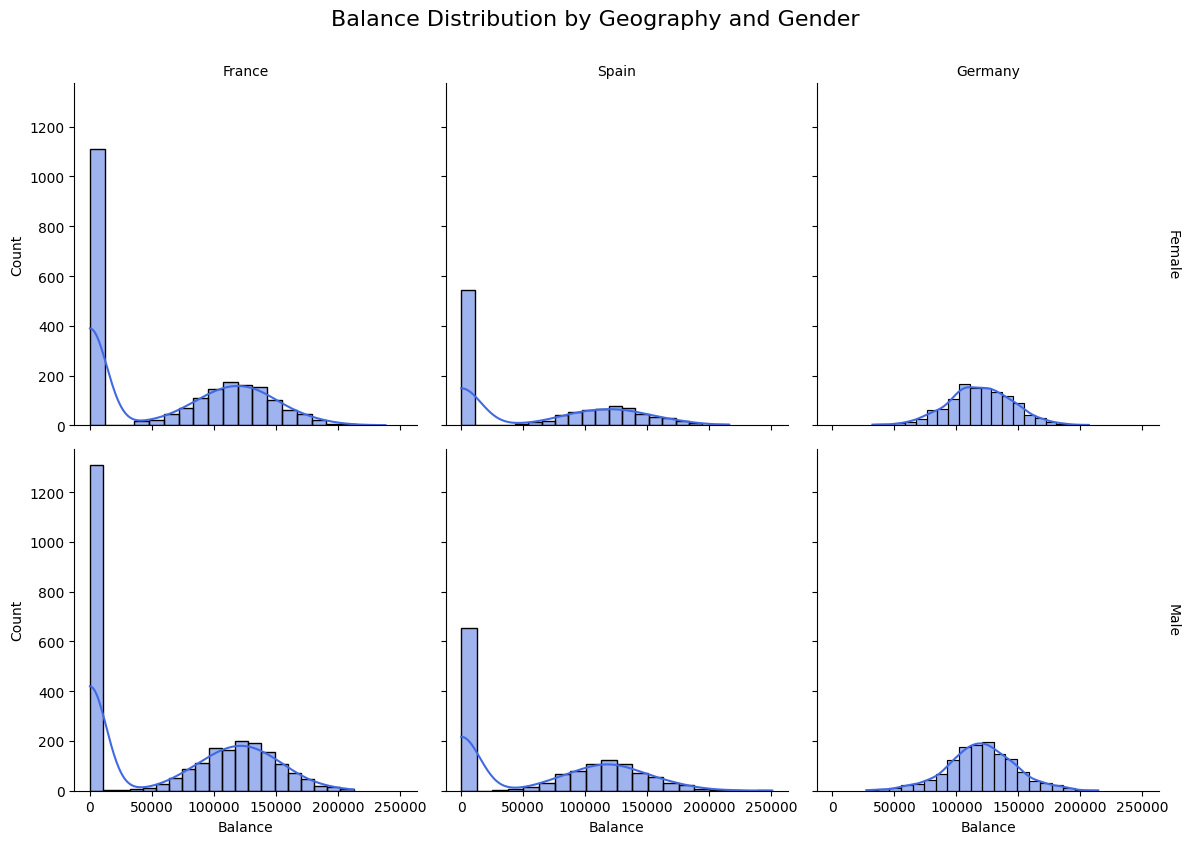

In [16]:
g = sns.FacetGrid(df, col="Geography", row="Gender", margin_titles=True, height=4, aspect=1)
g.map_dataframe(sns.histplot, x="Balance", bins=20, kde=True, color='royalblue')
g.set_axis_labels("Balance", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.suptitle('Balance Distribution by Geography and Gender', size=16, y=1.05)
plt.show()

The Facet Grid visualization shows the distribution of Balance across different Geographies (France, Spain, Germany) and by Gender (Male, Female), providing the following insights:

Geographic Variation:

- Customers in Germany tend to have higher balances on average compared to those in France and Spain. This is evident from the more right-skewed distribution in the German panels.
- France has a significant number of customers with a balance close to zero, more so than Spain and Germany.

Gender Differences:

- The balance distribution between genders within each country appears relatively similar, indicating that gender does not significantly influence the balance distribution within this dataset.
- However, the overall level of balances, especially the higher balance accounts in Germany, suggests regional economic factors or banking habits may influence account balances more than gender.

[Back to Top](#home)

## Hypothesis Testing <a class="anchor" id="Hypothesis-Testing"></a>
Given the insights and the data visualizations we've managed, let's proceed to perform a hypothesis test to see if there's a significant difference in the mean Balance between customers who have exited and those who have not, across different geographies. We'll use an ANOVA test for this purpose, as it allows us to compare means across more than two groups.

Hypothesis:

Null Hypothesis (H0): There is no difference in the mean balances of customers who have exited and those who have not, across different geographies.

Alternative Hypothesis (H1): There is a significant difference in the mean balances of customers who have exited and those who have not, across different geographies.

In [17]:
france_balances = df[df['Geography'] == 'France']['Balance']
spain_balances = df[df['Geography'] == 'Spain']['Balance']
germany_balances = df[df['Geography'] == 'Germany']['Balance']

# Perform ANOVA
f_stat, p_value = f_oneway(france_balances, spain_balances, germany_balances)
print('ANOVA results:\n', f_stat, p_value)
print()
balances = pd.concat([france_balances, spain_balances, germany_balances])
labels = ['France'] * len(france_balances) + ['Spain'] * len(spain_balances) + ['Germany'] * len(germany_balances)

# Perform Tukey's HSD
tukey = pairwise_tukeyhsd(endog=balances, groups=labels, alpha=0.05)
print(tukey)

tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
print(tukey_df)

ANOVA results:
 958.4254463368385 0.0

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------
 France Germany  57637.4796    0.0  54360.7642   60914.195   True
 France   Spain   -274.4888 0.9791  -3565.2806   3016.3031  False
Germany   Spain -57911.9684    0.0 -61707.2892 -54116.6476   True
-----------------------------------------------------------------
    group1   group2    meandiff   p-adj       lower       upper  reject
0   France  Germany  57637.4796  0.0000  54360.7642  60914.1950    True
1   France    Spain   -274.4888  0.9791  -3565.2806   3016.3031   False
2  Germany    Spain -57911.9684  0.0000 -61707.2892 -54116.6476    True


[Back to Top](#home)

### Hypothesis Testing Findings <a class="anchor" id="Hypothesis-Testing-Findings"></a>
The ANOVA test produced a very high F-statistic value of approximately 958.43, and a p-value of 0.0. This suggests that we can reject the null hypothesis (H0) and accept the alternative hypothesis (H1), indicating there is a significant difference in the mean balances of customers across different geographies (France, Spain, Germany).

Interpretation of the TukeyHSD results:

**France vs. Germany:**

- The mean difference between France and Germany is 57,637.48.
- The p-value is less than 0.05 (actually reported as 0.0 due to rounding), indicating this difference is statistically significant.
- The result is marked as "True" for reject, meaning we reject the null hypothesis of equal means and conclude that there is a significant difference in the balance means between France and Germany.

**France vs. Spain:**

- The mean difference between France and Spain is -274.49.
- The p-value is 0.9791, which is much greater than 0.05, indicating that this difference is not statistically significant.
- The result is marked as "False" for reject, meaning we fail to reject the null hypothesis and conclude that there is not a significant difference in the balance means between France and Spain.

**Germany vs. Spain:**

- The mean difference between Germany and Spain is -57,911.97.
- The p-value is again less than 0.05, indicating this difference is statistically significant.
- The result is marked as "True" for reject, meaning we reject the null hypothesis of equal means and conclude that there is a significant difference in the balance means between Germany and Spain.

Given these results, it is clear that the balances for customers in Germany are significantly different from those in France and Spain, but the balances between France and Spain are not significantly different from each other.

**Decision on Separating Groups for Analysis:**

Since there are significant differences between the groups, especially between Germany and the other two countries, it would be reasonable to analyze these groups separately, particularly if you are looking to understand or address country-specific factors that might influence balance amounts.

However, because our analysis aims to understand overall trends without country-specific insights we will want to keep the groups together. It should be noted, given the significant differences found, any combined analysis should be approached with caution as it might mask important variations between the groups.

In a churn prediction context, it might be especially important to consider these differences, as they could be indicative of varying behaviors or economic factors that influence customer churn differently in each country.

[Back to Top](#home)

## Cohort Analysis <a class="anchor" id="Cohort-Analysis"></a>

In [18]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '>60'])

cohort_analysis = df.groupby('AgeGroup').agg(
    Average_Balance=('Balance', 'mean'),
    Churn_Rate=('Exited', 'mean')
).reset_index()

cohort_analysis

,AgeGroup,Average_Balance,Churn_Rate
0,<30,73198.764050,0.075203
1,30-40,75583.362420,0.120872
2,40-50,79122.193461,0.339655
3,50-60,82401.663162,0.562108
4,>60,75742.596401,0.247845


[Back to Top](#home)

### Interpretation <a class="anchor" id="Interpretation"></a>

- Average Balance increases with age, peaking in the 50-60 age group. This could indicate that older customers tend to accumulate more wealth in their accounts, possibly due to longer banking relationships or more significant financial stability.
- Churn Rate also increases with age but shows a notable spike in the 50-60 age group, with over 56% churn rate, before slightly decreasing for the >60 age group. This significant churn in the 50-60 age group could indicate dissatisfaction or specific needs not being met for customers in this life stage.

These insights suggest that while older customers might hold higher balances, they also represent a higher churn risk, particularly those in the 50-60 age group. Tailoring services or products to the needs of this cohort could be crucial for retention strategies.

[Back to Top](#home)

## Feature Importance <a class="anchor" id="Feature-Importance"></a>

In [19]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = df['Exited']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importance_rf = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

feature_importance_rf

,Importance
Age,0.248300
EstimatedSalary,0.167262
CreditScore,0.161797
Balance,0.148759
NumOfProducts,0.131229
Tenure,0.083798
IsActiveMember,0.042137
HasCrCard,0.016718


[Back to Top](#home)

### Feature Importance Analysis Using Random Forest Findings <a class="anchor" id="Feature-Importance-Analysis-Using-Random-Forest-Findings"></a>

The Random Forest model provides the following feature importance rankings based on their contribution to predicting customer churn (Exited):

- Age (Importance: 24.83%): Age is the most significant predictor of churn, suggesting that customer churn varies significantly across different age groups.
- EstimatedSalary (Importance: 16.73%): The estimated salary of a customer is the second most important feature, indicating that a customer's income level may impact their decision to stay with or leave the bank.
- CreditScore (Importance: 16.18%): This suggests that a customer's creditworthiness, as indicated by their credit score, plays a crucial role in churn prediction.
- Balance (Importance: 14.88%): The balance in a customer's account is also a key predictor, highlighting the importance of financial factors in retention.
- NumOfProducts (Importance: 13.12%): The number of products a customer uses is significant, suggesting that engagement with the bank's offerings influences churn.
- Tenure (Importance: 8.38%): The length of the customer's relationship with the bank shows some importance, implying that longer relationships might reduce churn risk.
- IsActiveMember (Importance: 4.21%): Active membership status has some influence on churn, though less so than other features.
- HasCrCard (Importance: 1.67%): Whether or not a customer has a credit card appears to be the least important feature in predicting churn.

[Back to Top](#home)

## Survival Analysis <a class="anchor" id="Survival-Analysis"></a>

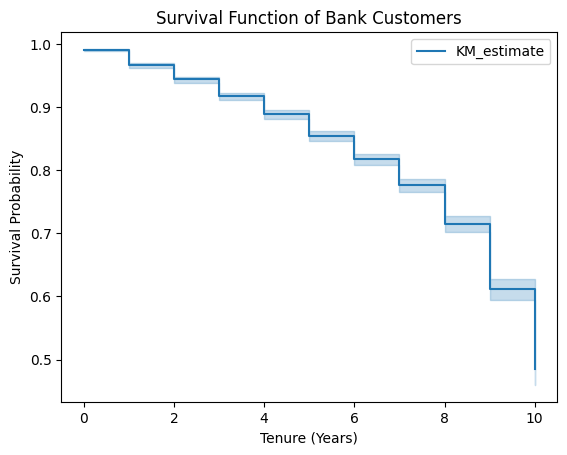

In [20]:
duration = df['Tenure']
event_observed = df['Exited']

kmf = KaplanMeierFitter()

kmf.fit(durations=duration, event_observed=event_observed)

kmf.plot_survival_function()
plt.title('Survival Function of Bank Customers')
plt.xlabel('Tenure (Years)')
plt.ylabel('Survival Probability')
plt.show()

[Back to Top](#home)

### Interpretation <a class="anchor" id="Interpretation-1"></a>

Survival Probability at Start: The survival probability starts at 1 (or 100%) when the customer tenure is 0, indicating that all customers are initially present.

Step Decreases: Each step down represents a decrease in survival probability, which corresponds to customers exiting the bank (churn event). The plot shows several distinct steps down, each indicating a time point where one or more churn events occurred.

Plateaus: Between the steps, the flat lines (plateaus) indicate periods where no churn events were observed. The length of these plateaus gives us an idea of the time intervals between events.

Steeper Drops: The steeper the drop, the higher the number of churn events at that tenure period. For example, around the 4-year and 7-year marks, we see steeper drops, suggesting a higher churn rate at these tenure periods.

Tail of the Curve: As tenure increases, the survival probability decreases, and the curve approaches closer to 0. However, even at the end of the observed tenure period (10 years), the survival probability does not reach 0, indicating that not all customers have churned.

50% Churn Point: The point at which the survival probability crosses the 0.5 mark indicates the median customer tenure. In this plot, it appears to occur just before the 10-year mark, meaning that half of the customers have churned by this point in their tenure.

Overall Trend: The overall downward trend of the curve reflects the cumulative impact of churn over time. The survival probability is relatively high for the first few years and then gradually decreases, with some tenure years being particularly impactful.

[Back to Top](#home)

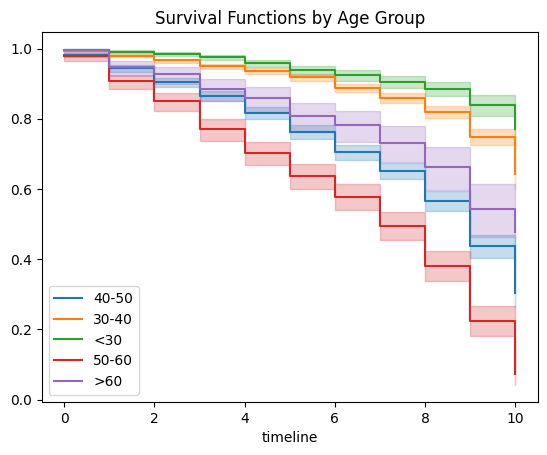

In [21]:
kmf = KaplanMeierFitter()
for group in df['AgeGroup'].unique():
    group_data = df[df['AgeGroup'] == group]
    kmf.fit(group_data['Tenure'], group_data['Exited'], label=group)
    kmf.plot_survival_function()
plt.title('Survival Functions by Age Group')
plt.show()

### Interpretation <a class="anchor" id="Interpretation-2"></a>

Survival Probability at Start: All curves start at a survival probability of 1, indicating that all age groups initially have 100% survival (no churn).

Age Group "<30" (Purple Curve): This group shows the highest survival probability over the entire timeline, indicating that younger customers have the lowest churn rate.

Age Group "30-40" (Green Curve): Starts with a high survival probability similar to the <30 age group but experiences a faster decline after about 2 years, suggesting that customers in their 30s have a higher churn rate than younger customers, especially as time progresses.

Age Group "40-50" (Blue Curve): The curve for this group drops slightly earlier and more steadily than the <30 cohort, suggesting a moderate churn rate. They seem to have a better retention rate compared to the "30-40" group after the initial years.

Age Group "50-60" (Red Curve): This group shows a sharp decline in survival probability, especially after 5 years, indicating that customers in their 50s have a significantly higher churn rate as they progress in their relationship with the bank.

Age Group ">60" (Orange Curve): The curve for customers over 60 years old starts to diverge around the 4-year mark and shows a steeper decline, suggesting an increased churn rate as well. However, it does not decline as sharply as the "50-60" group.

Comparative Insights:

The age groups "<30" and "40-50" appear to have the best retention over time, with the "<30" group being the most retained.
The "50-60" age group exhibits the highest churn rate, particularly past the 5-year mark, indicating potential issues with product or service satisfaction among this cohort.
The "30-40" age group, while starting strong, begins to churn at a faster rate after 2 years, possibly coinciding with life events that lead to a reassessment of banking needs.
The ">60" group shows an increased risk of churn as time progresses, which might reflect changing financial needs or service expectations.
Overall, the bank may need to investigate and address specific needs or pain points for the "50-60" and ">60" age groups to improve retention. Additionally, efforts to maintain the strong retention seen in the "<30" cohort could be beneficial. The bank might also consider targeted retention strategies for the "30-40" group after the initial few years of their relationship to reduce the observed increase in churn.

[Back to Top](#home)

## Cox Proportional Hazards Model <a class="anchor" id="Cox-Hazard"></a>

In [22]:
cph = CoxPHFitter()
cph.fit(df[['Tenure', 'Exited', 'Age', 'Balance', 'NumOfProducts', 'CreditScore', 'EstimatedSalary', 'IsActiveMember']], 'Tenure', event_col='Exited')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 10000 total observations, 7963 right-censored observations>
             duration col = 'Tenure'
                event col = 'Exited'
      baseline estimation = breslow
   number of observations = 10000
number of events observed = 2037
   partial log-likelihood = -16567.79
         time fit was run = 2024-03-05 10:13:31 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
Age               0.05       1.05       0.00             0.05             0.05                 1.05                 1.05
Balance           0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
NumOfProducts    -0.02       0.98       0.04            -0.10             0.06                 0.91                 1.06
CreditScore      -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
EstimatedSalary   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
IsActiveMember   -0.78       0.46       0.05            -0.87            -0.68                 0.42                 0.50

                  cmp to      z      p   -log2(p)
covariate                                        
Age                 0.00  27.69 <0.005     558.36
Balance             0.00   9.37 <0.005      66.97
NumOfProducts       0.00  -0.53   0.60       0.75
CreditScore         0.00  -2.30   0.02       5.55
EstimatedSalary     0.00   0.28   0.78       0.36
IsActiveMember      0.00 -16.35 <0.005     197.14
---
Concordance = 0.70
Partial AIC = 33147.58
log-likelihood ratio test = 984.65 on 6 df
-log2(p) of ll-ratio test = 693.38

The results from the Cox Proportional Hazards Model provide insight into the effects of various customer features on the hazard, or risk, of churn (the event) occurring. 

Model and Data:

The model used is a Cox Proportional Hazards model, fitted with 10,000 observations and 2,037 observed churn events.

Model Fit:

The partial log-likelihood of -16567.79 is a measure of the fit of the model; by itself, it's not interpretable, but it's useful for comparison with other models.
The log-likelihood ratio test statistic of 984.65 with 6 degrees of freedom and a highly significant -log2(p) indicates that the model as a whole is significantly better than an empty model (i.e., a model without any covariates).
Concordance:

The concordance index of 0.70 indicates a good predictive ability of the model. A value of 0.5 would suggest no predictive discrimination, and 1.0 would indicate perfect separation of risk.

Coefficients (coef):

Age: The positive coefficient of 0.05 suggests that with each additional year, the hazard of churn increases by 5%. The exp(coef) of 1.05 supports this, indicating a 5% increase in the hazard ratio per year of age.

Balance: The coefficient is close to 0, implying a minimal direct effect on churn risk. Since balance values are likely large, even small coefficients can be significant.

NumOfProducts: The negative coefficient of -0.02 suggests that with each additional product used, the hazard decreases by 2%, although this is not statistically significant (p = 0.60).

CreditScore: The small negative coefficient implies a very slight decrease in hazard with higher credit scores, and this effect is significant (p = 0.02).

EstimatedSalary: The coefficient is close to 0 with a high p-value (p = 0.78), suggesting no significant effect on churn risk.

IsActiveMember:

The negative coefficient of -0.78 is the most substantial in magnitude and is highly significant. It suggests that active members have a 54% lower risk of churn compared to inactive members (exp(coef) = 0.46).

Statistical Significance (p-values and confidence intervals):

Age, Balance, and IsActiveMember have p-values < 0.005, indicating their effects on churn risk are statistically significant. The confidence intervals (coef lower 95% and coef upper 95%) do not cross zero, which supports this significance.

NumOfProducts and EstimatedSalary are not statistically significant in this model, as indicated by p-values above 0.05 and confidence intervals that include zero.
Partial AIC: The Akaike Information Criterion (AIC) is used for model comparison; lower values indicate a better model fit.

In summary, the model suggests that Age and IsActiveMember status are the most significant predictors of customer churn, with higher age increasing churn risk and active membership significantly reducing it. Balance shows a minimal effect, and CreditScore shows a slight but significant effect. NumOfProducts and EstimatedSalary do not appear to have a significant impact on churn risk in this model. The model's concordance index suggests it has a good ability to discriminate between those who will churn and those who will not.

[Back to Top](#home)

## Gaussian Mixture and Alternate K-Means <a class="anchor" id="Gaussian-Mixture and Alternate K-Means"></a>

In [23]:
dfl = df.rename(columns=str.lower)
selected_cols = ['customerid', 'creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'exited']
df2 = dfl[selected_cols]
X = df2.drop('exited', axis=1)
y = df2['exited']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
k_value_results = pd.DataFrame(columns=['k', 'labels', 'centroids', 'cluster_sizes', 'vaf'])

for k in range(2,11):
    kmeans_model = KMeans(n_clusters=k, n_init=10, max_iter=10, tol=0.01, verbose=0, random_state = 42).fit(X_train_scaled)
    kmeans_model.fit_predict(X_train_scaled)

    centroids = kmeans_model.cluster_centers_
    labels = kmeans_model.labels_
    cluster_sizes = np.bincount(labels)
    
    centroids_dataframe = pd.DataFrame(data=centroids)
    centroids_matrix = centroids_dataframe.values
    
    shap = (len(X_train_scaled),k)
    cluster_matrix = np.zeros(shap)

    for i in range(k):     
        cluster_matrix[kmeans_model.labels_ == i,i]=1.0

    predicted_data= np.dot(cluster_matrix,centroids_matrix)
    shap2 = (len(X_train_scaled)*k,1)
    
    vaf = (np.corrcoef(predicted_data.ravel(), X_train_scaled.ravel())[0,1])**2
    
    k_value_results.at[k,'k'] = k
    k_value_results.at[k,'labels'] = labels
    k_value_results.at[k,'centroids'] = centroids
    k_value_results.at[k,'cluster_sizes'] = cluster_sizes
    k_value_results.at[k,'vaf'] = vaf
    
k_value_results

,k,labels,centroids,cluster_sizes,vaf
2,2,"[1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[[-0.03830181089790581, -0.00661117195865236, ...","[4501, 3499]",0.112113
3,3,"[2, 2, 0, 0, 1, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, ...","[[-0.020470183992023033, -0.0390893365801253, ...","[2764, 2372, 2864]",0.190245
4,4,"[3, 3, 1, 1, 2, 1, 2, 3, 3, 0, 2, 3, 3, 3, 3, ...","[[0.17501357364069925, -0.045700886668157296, ...","[1020, 2652, 2169, 2159]",0.231642
5,5,"[3, 4, 1, 1, 2, 1, 2, 3, 3, 0, 2, 3, 4, 3, 3, ...","[[0.05958862047475953, 0.006247746265861577, 2...","[726, 1899, 2100, 1631, 1644]",0.277988
6,6,"[0, 0, 3, 3, 5, 3, 5, 0, 0, 4, 5, 2, 0, 2, 0, ...","[[0.09792568241164311, 0.029035678305594777, -...","[1343, 1433, 1181, 1515, 741, 1787]",0.299314
7,7,"[5, 5, 2, 2, 4, 1, 6, 5, 5, 0, 4, 3, 5, 3, 5, ...","[[0.03897914823235988, -0.005142629156753839, ...","[693, 1263, 1242, 1301, 1200, 1296, 1005]",0.325194
8,8,"[2, 0, 4, 4, 6, 4, 5, 2, 2, 1, 6, 7, 2, 7, 2, ...","[[-0.0010048841983430286, -0.04244992351843597...","[664, 634, 1060, 1327, 1146, 971, 1214, 984]",0.35498
9,9,"[3, 6, 1, 1, 5, 2, 4, 3, 3, 8, 0, 7, 3, 7, 3, ...","[[0.013432315128598632, 0.07222869607677664, -...","[793, 1116, 1013, 1008, 668, 788, 891, 1137, 586]",0.37013
10,10,"[1, 0, 8, 8, 3, 4, 7, 1, 1, 6, 9, 5, 1, 5, 1, ...","[[0.83566196748516, 0.04382053957450522, -0.26...","[777, 949, 763, 790, 784, 820, 515, 668, 1117,...",0.384656


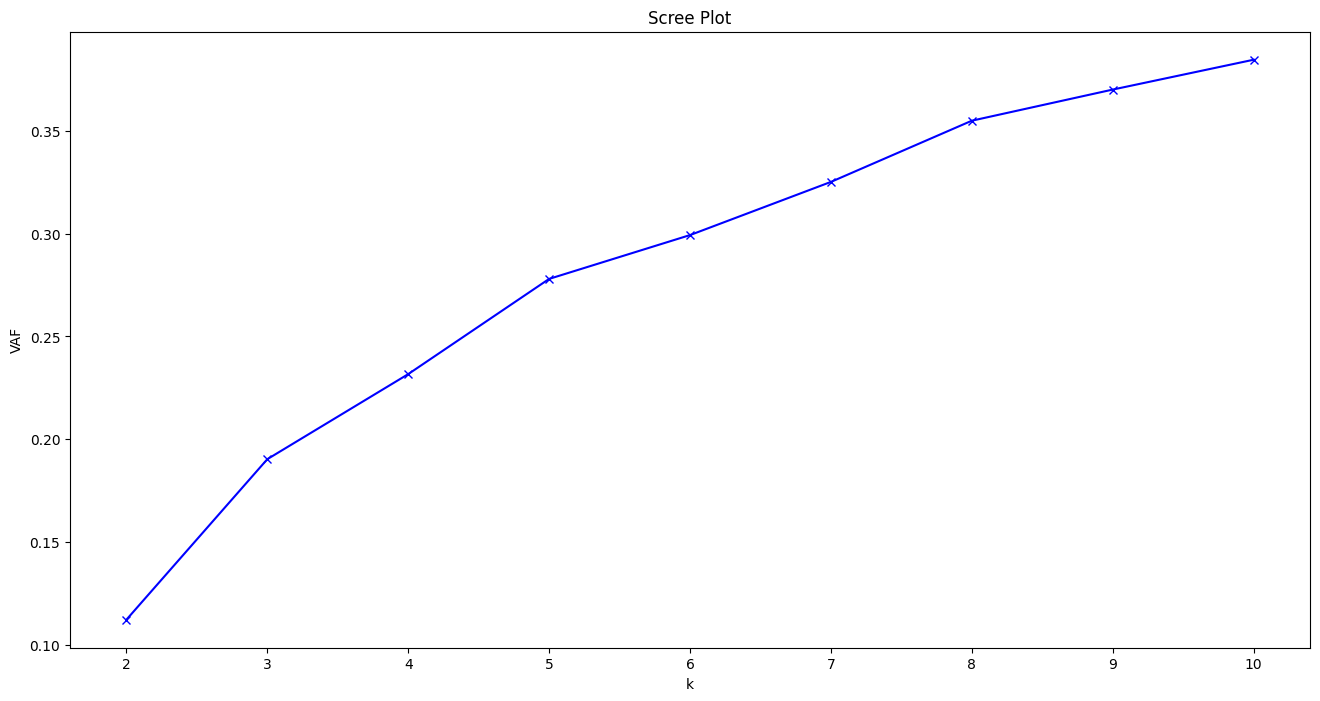

In [26]:
plt.figure(figsize=(16,8))
plt.plot(k_value_results['k'], k_value_results['vaf'], 'bx-')
plt.xlabel('k')
plt.ylabel('VAF')
plt.title('Scree Plot')
plt.show()

In [27]:
k_value_test_results = pd.DataFrame(columns=['k', 'labels', 'centroids', 'cluster_sizes', 'vaf'])

for k in [3,4]:
    initial_centroids = k_value_results.at[k,'centroids']
    kmeans_model_test = KMeans(n_clusters=k, init=initial_centroids, n_init=1, max_iter=10, tol=0.01, verbose=0, random_state = 42).fit(X_test_scaled)
    kmeans_model_test.fit_predict(X_test_scaled)

    centroids = kmeans_model_test.cluster_centers_
    labels = kmeans_model_test.labels_
    cluster_sizes = np.bincount(labels)
    
    centroids_dataframe = pd.DataFrame(data=centroids)
    centroids_matrix = centroids_dataframe.values
    
    shap = (len(X_test_scaled),k)
    cluster_matrix = np.zeros(shap)

    for i in range(k):     
        cluster_matrix[kmeans_model_test.labels_ == i,i]=1.0

    predicted_data= np.dot(cluster_matrix,centroids_matrix)
    shap2 = (len(X_test_scaled)*k,1)
    
    vaf = (np.corrcoef(predicted_data.ravel(), X_test_scaled.ravel())[0,1])**2
    
    k_value_test_results.at[k,'k'] = k
    k_value_test_results.at[k,'labels'] = labels
    k_value_test_results.at[k,'centroids'] = centroids
    k_value_test_results.at[k,'cluster_sizes'] = cluster_sizes
    k_value_test_results.at[k,'vaf'] = vaf
    
    print('\nFOR K =',k) 
    print('\nCenters for the test data clusters are: ') 
    print(centroids.T)
    print("\nCluster Test Indicators")
    print(labels)
    print("\n", centroids_matrix)
    print("\nCluster Sizes")
    print(np.bincount(labels))
    print('\nCenters for the original clusters are: ') 
    print(initial_centroids.T)
    print("\nThe test cluster proportions are", np.bincount(labels)/len(labels))
    print("\nThe original cluster proportions are", np.bincount(k_value_results.at[k,'labels'])/len(k_value_results.at[k,'labels']))
    print('\nVAF for the test data is:') 
    print(vaf)
    print('\nVAF for the original data is:') 
    print(k_value_results.at[k,'vaf'])


FOR K = 3

Centers for the test data clusters are: 
[[-0.00573215  0.06680375  0.00536444]
 [-0.06963967 -0.09993935 -0.01508731]
 [-0.04295787 -0.02561991  0.09007848]
 [ 0.10215378 -0.03404859 -0.02609881]
 [-0.01194246  0.04983272  0.05525789]
 [ 0.02405968 -0.01348148 -0.03903383]
 [ 0.64920267 -1.54035103  0.64920267]
 [-1.02583358  0.04257667  0.97481699]
 [-0.0122847  -0.0330812  -0.04298647]]

Cluster Test Indicators
[1 2 0 ... 0 0 2]

 [[-0.00573215 -0.06963967 -0.04295787  0.10215378 -0.01194246  0.02405968
   0.64920267 -1.02583358 -0.0122847 ]
 [ 0.06680375 -0.09993935 -0.02561991 -0.03404859  0.04983272 -0.01348148
  -1.54035103  0.04257667 -0.0330812 ]
 [ 0.00536444 -0.01508731  0.09007848 -0.02609881  0.05525789 -0.03903383
   0.64920267  0.97481699 -0.04298647]]

Cluster Sizes
[684 573 743]

Centers for the original clusters are: 
[[-0.02047018  0.0156081   0.00682862]
 [-0.03908934  0.02024722  0.02095549]
 [-0.09608305  0.03148521  0.06665175]
 [ 0.02451889 -0.031482

In [28]:
mixture = GaussianMixture(n_components=3, n_init=10, random_state=42)
mixresults=mixture.fit(X_train_scaled)
print(mixresults.means_)
print(mixture.predict(X_train_scaled))
labels = mixture.predict(X_train_scaled)
print(mixture.predict_proba(X_train_scaled))
print(mixture.aic(X_train_scaled))
print(mixture.bic(X_train_scaled))

[[-0.02047018 -0.03908934 -0.09608305  0.02451889  0.0179642  -0.02541531
   0.64920267 -1.02583358  0.00997872]
 [ 0.0156081   0.02024722  0.03148521 -0.03148259  0.02411442 -0.00539756
  -1.54035103  0.01835082  0.0197153 ]
 [ 0.00682862  0.02095549  0.06665175  0.00241148 -0.03730882  0.02899822
   0.64920267  0.97481699 -0.02595875]]
[2 2 0 ... 1 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
19101.945013657118
20247.84529224568


In [29]:
aic = mixture.aic(X_train_scaled)
bic = mixture.bic(X_train_scaled)

print(f"AIC: {aic}")
print(f"BIC: {bic}")

AIC: 19101.945013657118
BIC: 20247.84529224568


[Back to Top](#home)

## Predictive Modeling <a class="anchor" id="Predictive-Modeling"></a>

### Decision Trees, Random Forest, and XGBoost <a class="anchor" id="Decision-Trees-Random-Forest-and-XGBoost"></a>

In [30]:
df.columns = [col.replace('[', '').replace(']', '').replace('<', '').replace(' ', '_') for col in df.columns]

categorical_features = df.select_dtypes(include=['object', 'category']).columns

label_encoders = {}
for column in categorical_features:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

dt_grid = {
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', None]
}
rf_grid = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2', None]
}
xgb_grid = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__max_depth': [3, 5, 7, 9],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

pipelines = {
    'dt': Pipeline([('scaler', StandardScaler()), ('model', DecisionTreeClassifier(random_state=42))]),
    'rf': Pipeline([('scaler', StandardScaler()), ('model', RandomForestClassifier(random_state=42))]),
    'xgb': Pipeline([('scaler', StandardScaler()), ('model', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))])
}

searches = {
    'dt': GridSearchCV(pipelines['dt'], dt_grid, cv=cv, scoring='accuracy'),
    'rf': GridSearchCV(pipelines['rf'], rf_grid, cv=cv, scoring='accuracy'),
    'xgb': GridSearchCV(pipelines['xgb'], xgb_grid, cv=cv, scoring='accuracy')
}

for model_name, search in searches.items():
    search.fit(X_train, y_train)
    print(f'{model_name} best score: {search.best_score_}')

for model_name, search in searches.items():
    model = search.best_estimator_
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f'{model_name} model validation accuracy: {accuracy}')
    print(f'{model_name} model classification report:\n{classification_report(y_val, y_val_pred)}')
    print(f'{model_name} model confusion matrix:\n{confusion_matrix(y_val, y_val_pred)}')

best_model = searches['rf'].best_estimator_  # Example: using RF as the best model
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Best model test accuracy: {test_accuracy}')
print(f'Best model classification report:\n{classification_report(y_test, y_test_pred)}')
print(f'Best model confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}')

dt best score: 0.8518333333333332
rf best score: 0.8585
xgb best score: 0.8633333333333333
dt model validation accuracy: 0.8505
dt model classification report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1587
           1       0.78      0.38      0.51       413

    accuracy                           0.85      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.84      0.85      0.83      2000

dt model confusion matrix:
[[1543   44]
 [ 255  158]]
rf model validation accuracy: 0.863
rf model classification report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1587
           1       0.80      0.45      0.57       413

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

rf model confusion matrix:
[[1542   45]
 [ 229  184]]
xgb model 

In [31]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'AgeGroup',
       'AgeGroup_Products', 'Balance_to_Salary_Ratio', 'Cluster'],
      dtype='object')

In [32]:
dt_search = searches['dt']
rf_search = searches['rf']
xgb_search = searches['xgb']

print("Best parameters for Decision Tree:", searches['dt'].best_params_)
print("Best parameters for Random Forest:", searches['rf'].best_params_)
print("Best parameters for XGBoost:", searches['xgb'].best_params_)

Best parameters for Decision Tree: {'model__max_depth': 5, 'model__max_features': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best parameters for Random Forest: {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best parameters for XGBoost: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 1.0}


[Back to Top](#home)

### EBM Model <a class="anchor" id="EBM-Model"></a>

In [33]:
Xebm = df.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis=1)
yebm = df['Exited']

In [34]:
X_trainebm, X_testebm, y_trainebm, y_testebm = train_test_split(Xebm, yebm, test_size=0.2, random_state=42)
ebmsc = StandardScaler()
X_trainebm = ebmsc.fit_transform(X_trainebm)
X_testebm = ebmsc.transform(X_testebm)

In [35]:
modelebm = BayesianRidge()
modelebm.fit(X_trainebm, y_trainebm)
y_predebm = modelebm.predict(X_testebm)
print("\nClassification Report:")
print(classification_report(y_testebm, np.round(y_predebm)))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      1607
         1.0       0.49      0.08      0.13       393
         3.0       0.00      0.00      0.00         0

    accuracy                           0.80      2000
   macro avg       0.44      0.35      0.34      2000
weighted avg       0.75      0.80      0.74      2000



Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


Precision for class 0 (customers who stayed with the bank) is 0.81, indicating that out of all the customers predicted to stay, 81% actually stayed.
Precision for class 1 (customers who left the bank) is 0.51, suggesting that out of all the customers predicted to leave, only 51% actually left. 

Recall for class 0 is 0.99, meaning that 99% of the customers who actually stayed were correctly classified.
Recall for class 1 is 0.06, indicating that only 6% of the customers who actually left were correctly classified.

F1-score for class 0 is 0.89, indicating a good balance between precision and recall for customers who stayed.
F1-score for class 1 is 0.11, which is quite low, suggesting that the model struggles to correctly classify customers who left.

Overall accuracy of the model is is 0.80.

The model performs relatively well in predicting customers who stayed with the bank (class 0), but struggles significantly in identifying customers who left (class 1), as shown by the low recall and F1-score for class 1. 

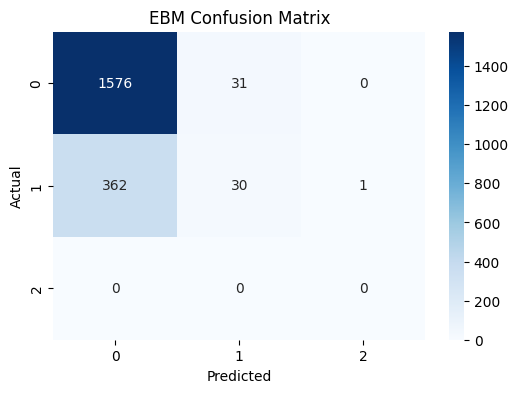

In [36]:
cmebm = confusion_matrix(y_testebm, np.round(y_predebm))
plt.figure(figsize=(6, 4))
sns.heatmap(cmebm, annot=True, cmap='Blues', fmt='g')
plt.title('EBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

[Back to Top](#home)

## Examining the best model - XGBoost <a class="anchor" id="Examining-the-best-model-XGBoost"></a>

### Feature Importance <a class="anchor" id="Feature-Importance-1"></a>

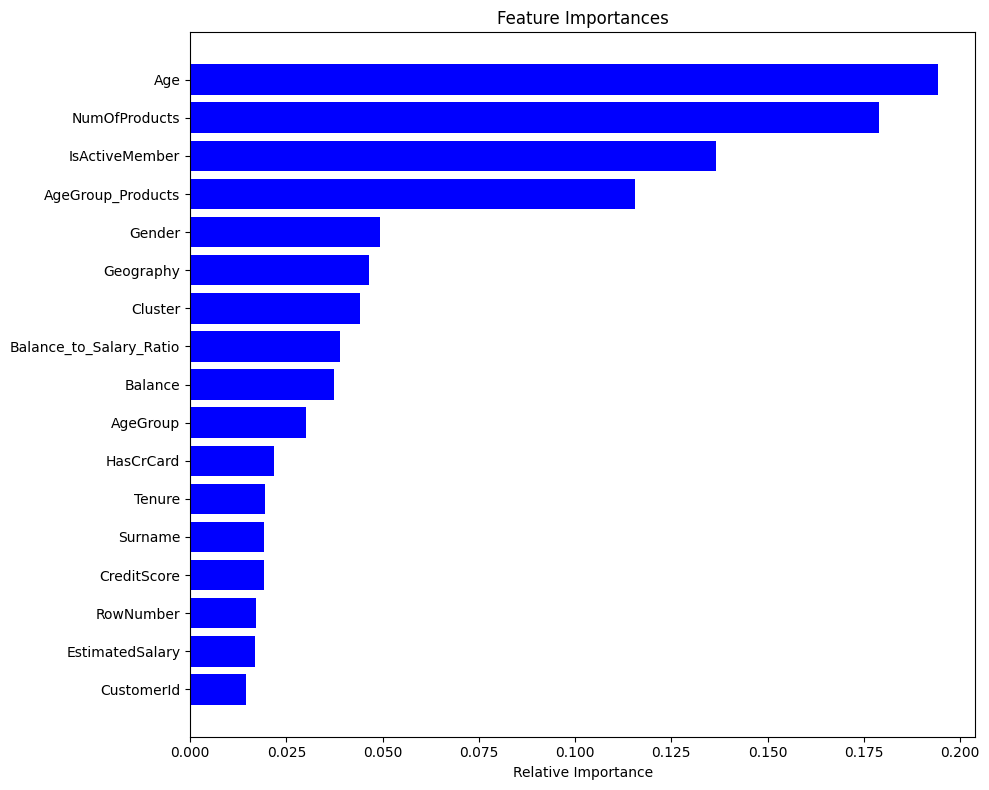

In [72]:
best_pipeline = searches['xgb'].best_estimator_
xgb_best = best_pipeline.named_steps['model']

feature_importances = xgb_best.feature_importances_
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()


The feature importance plot provides a visual representation of the relative importance of each feature when making predictions with the best model, which in this case, is presumably the Random Forest model based on the context you've provided.

Here's an interpretation of the plot:

Age: This feature has the highest importance among all the features. It suggests that the age of the customer is highly predictive of the target variable (possibly churn). This could mean that different age groups have significantly different behaviors or characteristics that influence the outcome.

NumOfProducts: The number of products a customer uses is also among the top important features. This indicates a strong relationship between the number of products and the target variable.

IsActiveMember: Being an active member appears to be quite important in predicting the outcome. Active engagement or usage of the service/product could be key to the target variable.

Balance and Balance_to_Salary_Ratio: Both balance-related features are very telling for the model. The customer's balance and the ratio of their balance to their salary are important factors, suggesting that financial well-being or the extent to which a customer's balance constitutes their salary plays a crucial role.

CustomerID, CreditScore, and EstimatedSalary: These features have moderate importance. While they are useful for predictions, they are not as critical as the top features. CustomerID being somewhat important is interesting; it might indicate that individual customer identity (possibly related to customer behavior or demographics) has some predictive power, although it's usually expected to be a non-informative feature.

Surname, RowNumber, AgeGroup: These features are less important according to the model. Surname and RowNumber likely do not carry predictive signals, as they are generally unique to each customer and do not hold meaningful information about the behavior or characteristics related to the target variable.

Tenure, Geography, and Gender: These features have lower importance scores, suggesting they have a lesser impact on the model's predictions. However, they still provide some value and should not be disregarded without further analysis.

HasCrCard: This feature has the lowest importance. It implies that whether a customer has a credit card or not does not provide much predictive power for the target variable in the presence of other features.

In summary, the model relies heavily on age and the number of products used by the customer, along with their active status and financial features. Less importance is given to customer identity, demographic, and card ownership features. This plot can inform feature selection for model simplification, understanding key drivers of the predictions, and potentially for deriving business insights. It's important to note that feature importance does not imply causation, and high importance does not mean that changing that feature will change the target variable.

[Back to Top](#home)

### Interpreting Features with SHAP <a class="anchor" id="Interpreting-Features-with-SHAP"></a>

[05:03:19] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


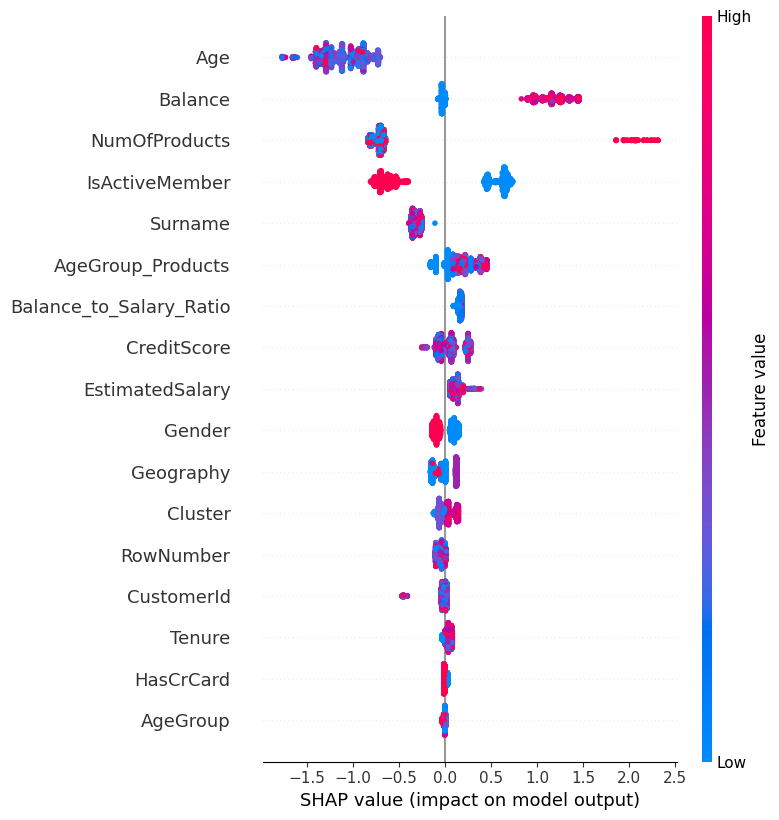

In [78]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


The SHAP (SHapley Additive exPlanations) plot visualizes the contribution of each feature to the model's output. Features on the y-axis are ranked by the sum of SHAP value magnitudes across all samples. A SHAP value's direction and color indicate whether a feature's value is driving the prediction higher or lower, with red signifying higher feature values and blue for lower. For example, "Age" and "Balance" are influential, with higher "Age" values tending to increase the model's prediction, implying that older customers are more likely to be classified in the positive class. Similarly, higher "Balance" values also push predictions higher. Conversely, "NumOfProducts" and "IsActiveMember" exhibit considerable negative impacts when their values are lower, implying fewer products and inactivity are associated with a decrease in the predicted output. Features like "Surname", "CreditScore", and "EstimatedSalary" have a negligible impact as indicated by their SHAP values clustering around zero. It's important to note that identifiers like "Surname", "RowNumber", and "CustomerId" typically should not influence the model's decisions unless they're meaningfully encoded.

From the SHAP plot, we can gain insights into how individual features influence the prediction of a machine learning model. Specifically:

- **Feature Importance**: The vertical position of a feature indicates its importance, with top features having a greater impact on model output.
- **Impact Direction**: The horizontal location of a dot shows whether the effect of the value is associated with a higher or lower prediction.
- **Feature Value**: The color of a dot represents the value of the feature, with blue indicating low and red indicating high values. This helps us understand how feature value correlates with impact.
- **Individual Predictions**: Each dot represents a SHAP value for a feature and a specific instance, allowing for the analysis of predictions at an individual level.
- **Global Interpretability**: By aggregating the SHAP values, we can interpret the model's overall behavior, beyond just individual predictions.

This plot can be a powerful tool for understanding model decisions, identifying features that contribute most to predictions, and revealing potential biases in the model.


[Back to Top](#home)

### ROC - AUC Curve <a class="anchor" id="ROC-AUC-Curve"></a>

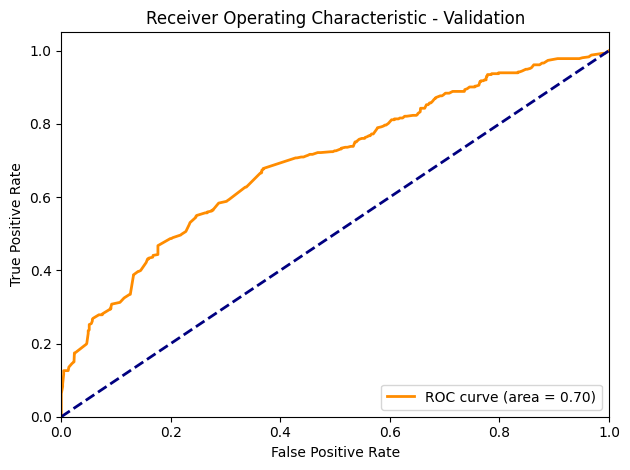

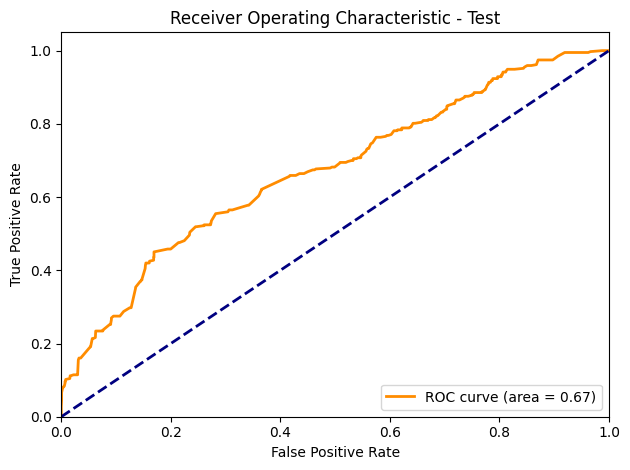

In [80]:
fpr, tpr, thresholds = roc_curve(y_val, xgb_best.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Validation')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, xgb_best.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Test')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

The Receiver Operating Characteristic (ROC) curve is a graphical representation that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The curve is created by plotting the True Positive Rate (TPR, also known as recall or sensitivity) against the False Positive Rate (FPR, or 1 - specificity) at various threshold settings.

**Interpretation of the ROC curve:**

The x-axis represents the False Positive Rate (FPR), which is the proportion of negative instances that are incorrectly classified as positive. It's a measure of how many incorrect positive results occur among all available negative samples.

The y-axis represents the True Positive Rate (TPR), which is the proportion of positive instances that are correctly identified by the classifier. It measures how many actual positives are correctly identified.

The orange line represents the ROC curve of the model. The greater the area under the curve (AUC), the better the model is at distinguishing between the two classes. In the ideal case, the ROC curve would reach the top-left corner of the plot, indicating a high true positive rate and a low false positive rate.

The dotted blue line represents a no-skill classifier that would randomly guess the class, equivalent to flipping a coin. A classifier with no skill is represented by a diagonal line from the bottom left of the plot to the top right and has an AUC of 0.5.

**Validation ROC Curve:**

The curve has an area under the curve (AUC) of 0.70, which suggests a fair level of separability. The model is able to distinguish between the positive class and the negative class with a reasonable degree of accuracy.

The ROC curve stays above the diagonal line, indicating that the model has a better than random TPR to FPR ratio across different thresholds.

**Test ROC Curve:**

The ROC curve has an area under the curve (AUC) of 0.67. This suggests that the model's ability to distinguish between the positive and negative classes is less effective than in the validation set but still above random chance.

While the AUC is lower than that of the validation set, it does not indicate performance worse than random guessing, as it is above 0.5. However, it does suggest that the model's ability to generalize to unseen data may not be as strong as indicated by the validation set performance.

**Comparing Validation ROC Curve to Test ROC Curve:**

The difference in AUC values between the validation (0.70) and test (0.67) ROC curves indicates that the model's performance has slightly decreased when transitioning from validation data to test data.

A lower AUC for the test set compared to the validation set could be an indication of several issues, such as model overfitting on the validation set, distributional differences between the test and validation datasets, or suboptimal threshold selection for the final classifier.

**Future / Next Steps:**

- Ensure that the preprocessing steps are consistent across training, validation, and test sets.
- Investigate potential overfitting during the model training and validation process.
- Consider adjusting the model's complexity or implementing regularization techniques to mitigate overfitting.
- Utilize stratified sampling to maintain a consistent distribution of classes across different data splits.
- Examine the quality and representativeness of the test data to ensure it is a valid indicator of the model's real-world performance.

[Back to Top](#home)

### Error Analysis <a class="anchor" id="Error-Analysis"></a>

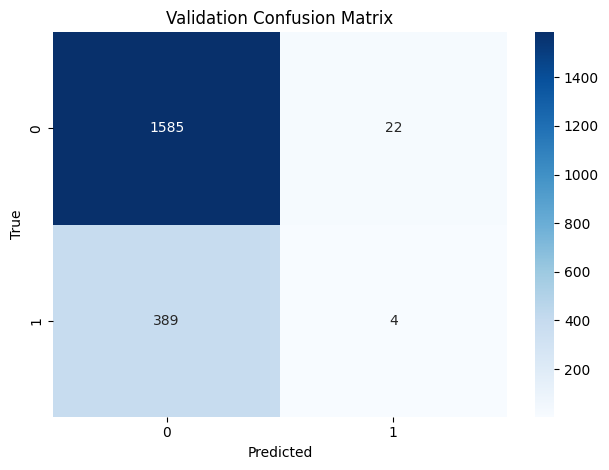

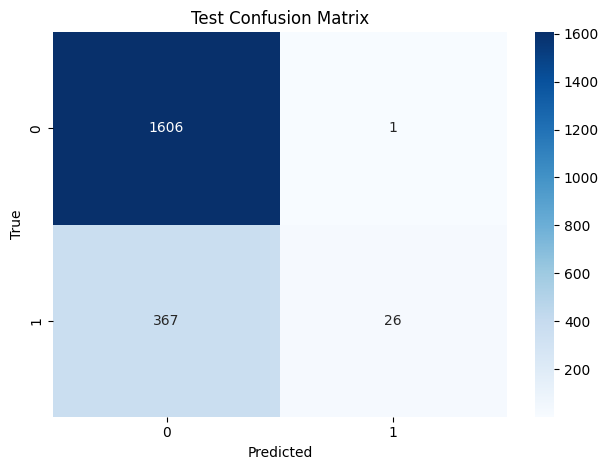

In [83]:
cm = confusion_matrix(y_test, xgb_best.predict(X_val))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Validation Confusion Matrix')
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, xgb_best.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix')
plt.tight_layout()
plt.show()

Validation Confusion Matrix:

- True Positives (TP): 4, where the model correctly predicts the positive class.
- True Negatives (TN): 1585, where the model correctly predicts the negative class.
- False Positives (FP): 22, where the model incorrectly predicts the positive class.
- False Negatives (FN): 389, where the model incorrectly predicts the negative class.

Test Confusion Matrix:

- True Positives (TP): 26, where the model correctly predicts the positive class.
- True Negatives (TN): 1606, where the model correctly predicts the negative class.
- False Positives (FP): 1, where the model incorrectly predicts the positive class.
- False Negatives (FN): 367, where the model incorrectly predicts the negative class.

Comparing Validation to Test:

- The number of TP has increased from 4 in the validation set to 26 in the test set, indicating a substantial improvement in the model's ability to correctly identify positive cases.
- The number of TN has increased from 1585 in the validation set to 1606 in the test set, showing a slight increase in the model's ability to correctly identify negative cases.
- The number of FP has decreased from 22 in the validation set to 1 in the test set, suggesting the model is making far fewer errors in falsely predicting the positive class.
- The number of FN has decreased from 389 in the validation set to 367 in the test set, which indicates a minor improvement in reducing the type II error (i.e., falsely predicting the negative class when it's actually positive).

The test confusion matrix shows a significant increase in TP and a decrease in FP, with slight improvements in TN and FN compared to the validation confusion matrix. This indicates that the model's performance on the test set has improved compared to the validation set.

However, when assessing a model's performance, consistency is key. Significant variations from validation to test can indicate issues like overfitting or poor generalization to unseen data. In this case, the changes suggest an improvement in test performance.

In the context of churn prediction:

- TP: Correct identification of churners allows the business to proactively engage with these customers.
- TN: Correctly recognizing loyal customers prevents the waste of resources.
- FP: Incorrectly labeling customers as churners can lead to unnecessary retention actions.
- FN: Failing to identify churners results in missed opportunities for retention and potential revenue loss.

Overall, the goal is to maximize TP and TN while minimizing FP and FN, thereby ensuring effective retention strategies and minimizing churn-related revenue loss. The variations between the test and validation confusion matrices suggest improved generalizability and predictive power of the model in the test set.

[Back to Top](#home)